<a href="https://colab.research.google.com/github/toaomalkster/conscious-calculator-notebooks/blob/feature%2F20201025-load-existing-notebooks/ConscConcluderV2_0_1_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conscious Concluder _(Theory V2)_
0.1-clean:
* Cleaned up version of 0.1.

**App Boilerplate**

In [ ]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.3.0


# Setup Training Data

In [ ]:
data = np.random.randint(100, size=(1000, 2))
data[0:10,:]

array([[84, 41],
       [28, 12],
       [20, 83],
       [84, 44],
       [13, 28],
       [18, 60],
       [61, 42],
       [42, 55],
       [30, 15],
       [95, 41]])

In [ ]:
data_labels = (data[:,0] + data[:,1])[:,np.newaxis]
data_labels[0:10,:]

array([[125],
       [ 40],
       [103],
       [128],
       [ 41],
       [ 78],
       [103],
       [ 97],
       [ 45],
       [136]])

# Setup Model

In [ ]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(2,)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              3000      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1001      
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fitres = model.fit(data, data_labels, validation_split=0.2, shuffle=True, epochs=150)

Epoch 1/150
25/25 [==============================] - 0s 7ms/step - loss: 4759.3730 - val_loss: 221.9981
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 113.6856 - val_loss: 29.6560
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 13.8795 - val_loss: 6.2120
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 4.7354 - val_loss: 3.1965
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 2.6691 - val_loss: 2.2676
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 1.8135 - val_loss: 1.5645
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 1.2468 - val_loss: 1.0876
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.8514 - val_loss: 0.7881
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6066 - val_loss: 0.5711
Epoch 10/150
25/25 [==============================] - 0s 2ms/step - loss: 0.4333 - val_loss: 0.4226


In [ ]:
print(['x', 'y', 'expected', 'actual'])
print(np.concatenate((data[800:810], data_labels[800:810], model.predict(data[800:810])), axis=1))

['x', 'y', 'expected', 'actual']
[[ 12.          84.          96.          95.99134064]
 [ 84.          19.         103.         103.01068878]
 [  4.          59.          63.          62.99835968]
 [ 27.          98.         125.         124.9959259 ]
 [ 13.           0.          13.          13.03275394]
 [ 22.           7.          29.          29.01239586]
 [ 46.          53.          99.          98.99874115]
 [ 27.          87.         114.         113.99848938]
 [  6.          31.          37.          37.01805496]
 [ 84.          31.         115.         114.97537231]]


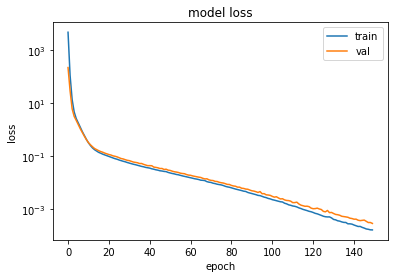

In [ ]:
plt.semilogy(fitres.history['loss'])
plt.semilogy(fitres.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()